In [18]:
%%capture
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import src.models.NetworkX_main as main
from fa2 import ForceAtlas2
from importlib import reload
%matplotlib inline

In [19]:
reload(main)

<module 'src.models.NetworkX_main' from 'C:\\Users\\LM532JA\\Anaconda3\\envs\\GraphNetworks\\lib\\site-packages\\src\\models\\NetworkX_main.py'>

## Tasks

In [3]:
G = nx.read_gpickle("C:\\Users\\LM532JA\\GitHub\\ATP_NetworkX\\graphs\\ATP_Graph.gpickle")

**1. Task : Visualize the graph structure.**

**2. Task : Return the properties for a certain node type.**

In [ ]:
G.nodes()

In [ ]:
G.nodes()['CLM46614']

In [ ]:
G.nodes()['BENE56010']

**3. Task : Return all the node labels (i.e. different categories) and the number of distinct nodes in each label.**

In [ ]:
l = [G.nodes()[node]['label'] for node in G.nodes()]
Counter(l)

## Exercises

**1. Example : Find the top 5 states with the most beneficiaries.**

## Algorithms

In [4]:
test = main.EdgesView(G, ['CLM46614','CLM34721'])

In [5]:
test.keys()

dict_keys(['CLM46614', 'CLM34721'])

In [6]:
[key for i in tuple(test.values()) for key in i]

['PRV55912',
 'BENE11001',
 '1970',
 '4019',
 '5853',
 '7843',
 '2768',
 '71590',
 '2724',
 '19889',
 '5849',
 '201',
 '7866',
 'PHY390922',
 'PRV55912',
 7769.0,
 5849.0,
 'BENE17521',
 '4240',
 '2639',
 '2948',
 '40390',
 '45821',
 '28489',
 '5854',
 '2753',
 'E9305',
 '987',
 '45340',
 'PHY349293',
 'PHY370861',
 'PHY363291']

In [7]:
claims = [n for n in list(G.nodes()) if G.nodes()[n]['label']=='Claim']

In [8]:
G.edges(claims[:20])

OutMultiEdgeDataView([('CLM46614', 'PRV55912'), ('CLM46614', 'BENE11001'), ('CLM46614', '1970'), ('CLM46614', '4019'), ('CLM46614', '5853'), ('CLM46614', '7843'), ('CLM46614', '2768'), ('CLM46614', '71590'), ('CLM46614', '2724'), ('CLM46614', '19889'), ('CLM46614', '5849'), ('CLM46614', '201'), ('CLM46614', '7866'), ('CLM46614', 'PHY390922'), ('CLM34721', 'PRV55912'), ('CLM34721', 7769.0), ('CLM34721', 5849.0), ('CLM34721', 'BENE17521'), ('CLM34721', '4240'), ('CLM34721', '2639'), ('CLM34721', '2948'), ('CLM34721', '40390'), ('CLM34721', '45821'), ('CLM34721', '28489'), ('CLM34721', '5854'), ('CLM34721', '2753'), ('CLM34721', 'E9305'), ('CLM34721', '987'), ('CLM34721', '45340'), ('CLM34721', 'PHY349293'), ('CLM34721', 'PHY370861'), ('CLM34721', 'PHY363291'), ('CLM72336', 'PRV55912'), ('CLM72336', 9338.0), ('CLM72336', 'BENE21718'), ('CLM72336', 'V5789'), ('CLM72336', 'V5789'), ('CLM72336', '4168'), ('CLM72336', '73313'), ('CLM72336', '7812'), ('CLM72336', '7993'), ('CLM72336', '78830')

In [21]:
test1 = main.EdgesView(G, claims[:500])
test2 = [key for i in tuple(test1.values()) for key in i]

In [22]:
test = claims[:500]+test2

In [35]:
H = G.subgraph(test)

In [24]:
simrak = nx.simrank_similarity(H)
print(simrak)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
H.number_of_nodes()

2821

100%|██████████████████████████████████████████████████████████████| 2500/2500 [02:24<00:00, 17.35it/s]


BarnesHut Approximation  took  33.89  seconds
Repulsion forces  took  106.14  seconds
Gravitational forces  took  0.44  seconds
Attraction forces  took  0.25  seconds
AdjustSpeedAndApplyForces step  took  1.44  seconds


(-39939.88920942763, 41584.30271787875, -35001.10869282455, 38838.364385016306)

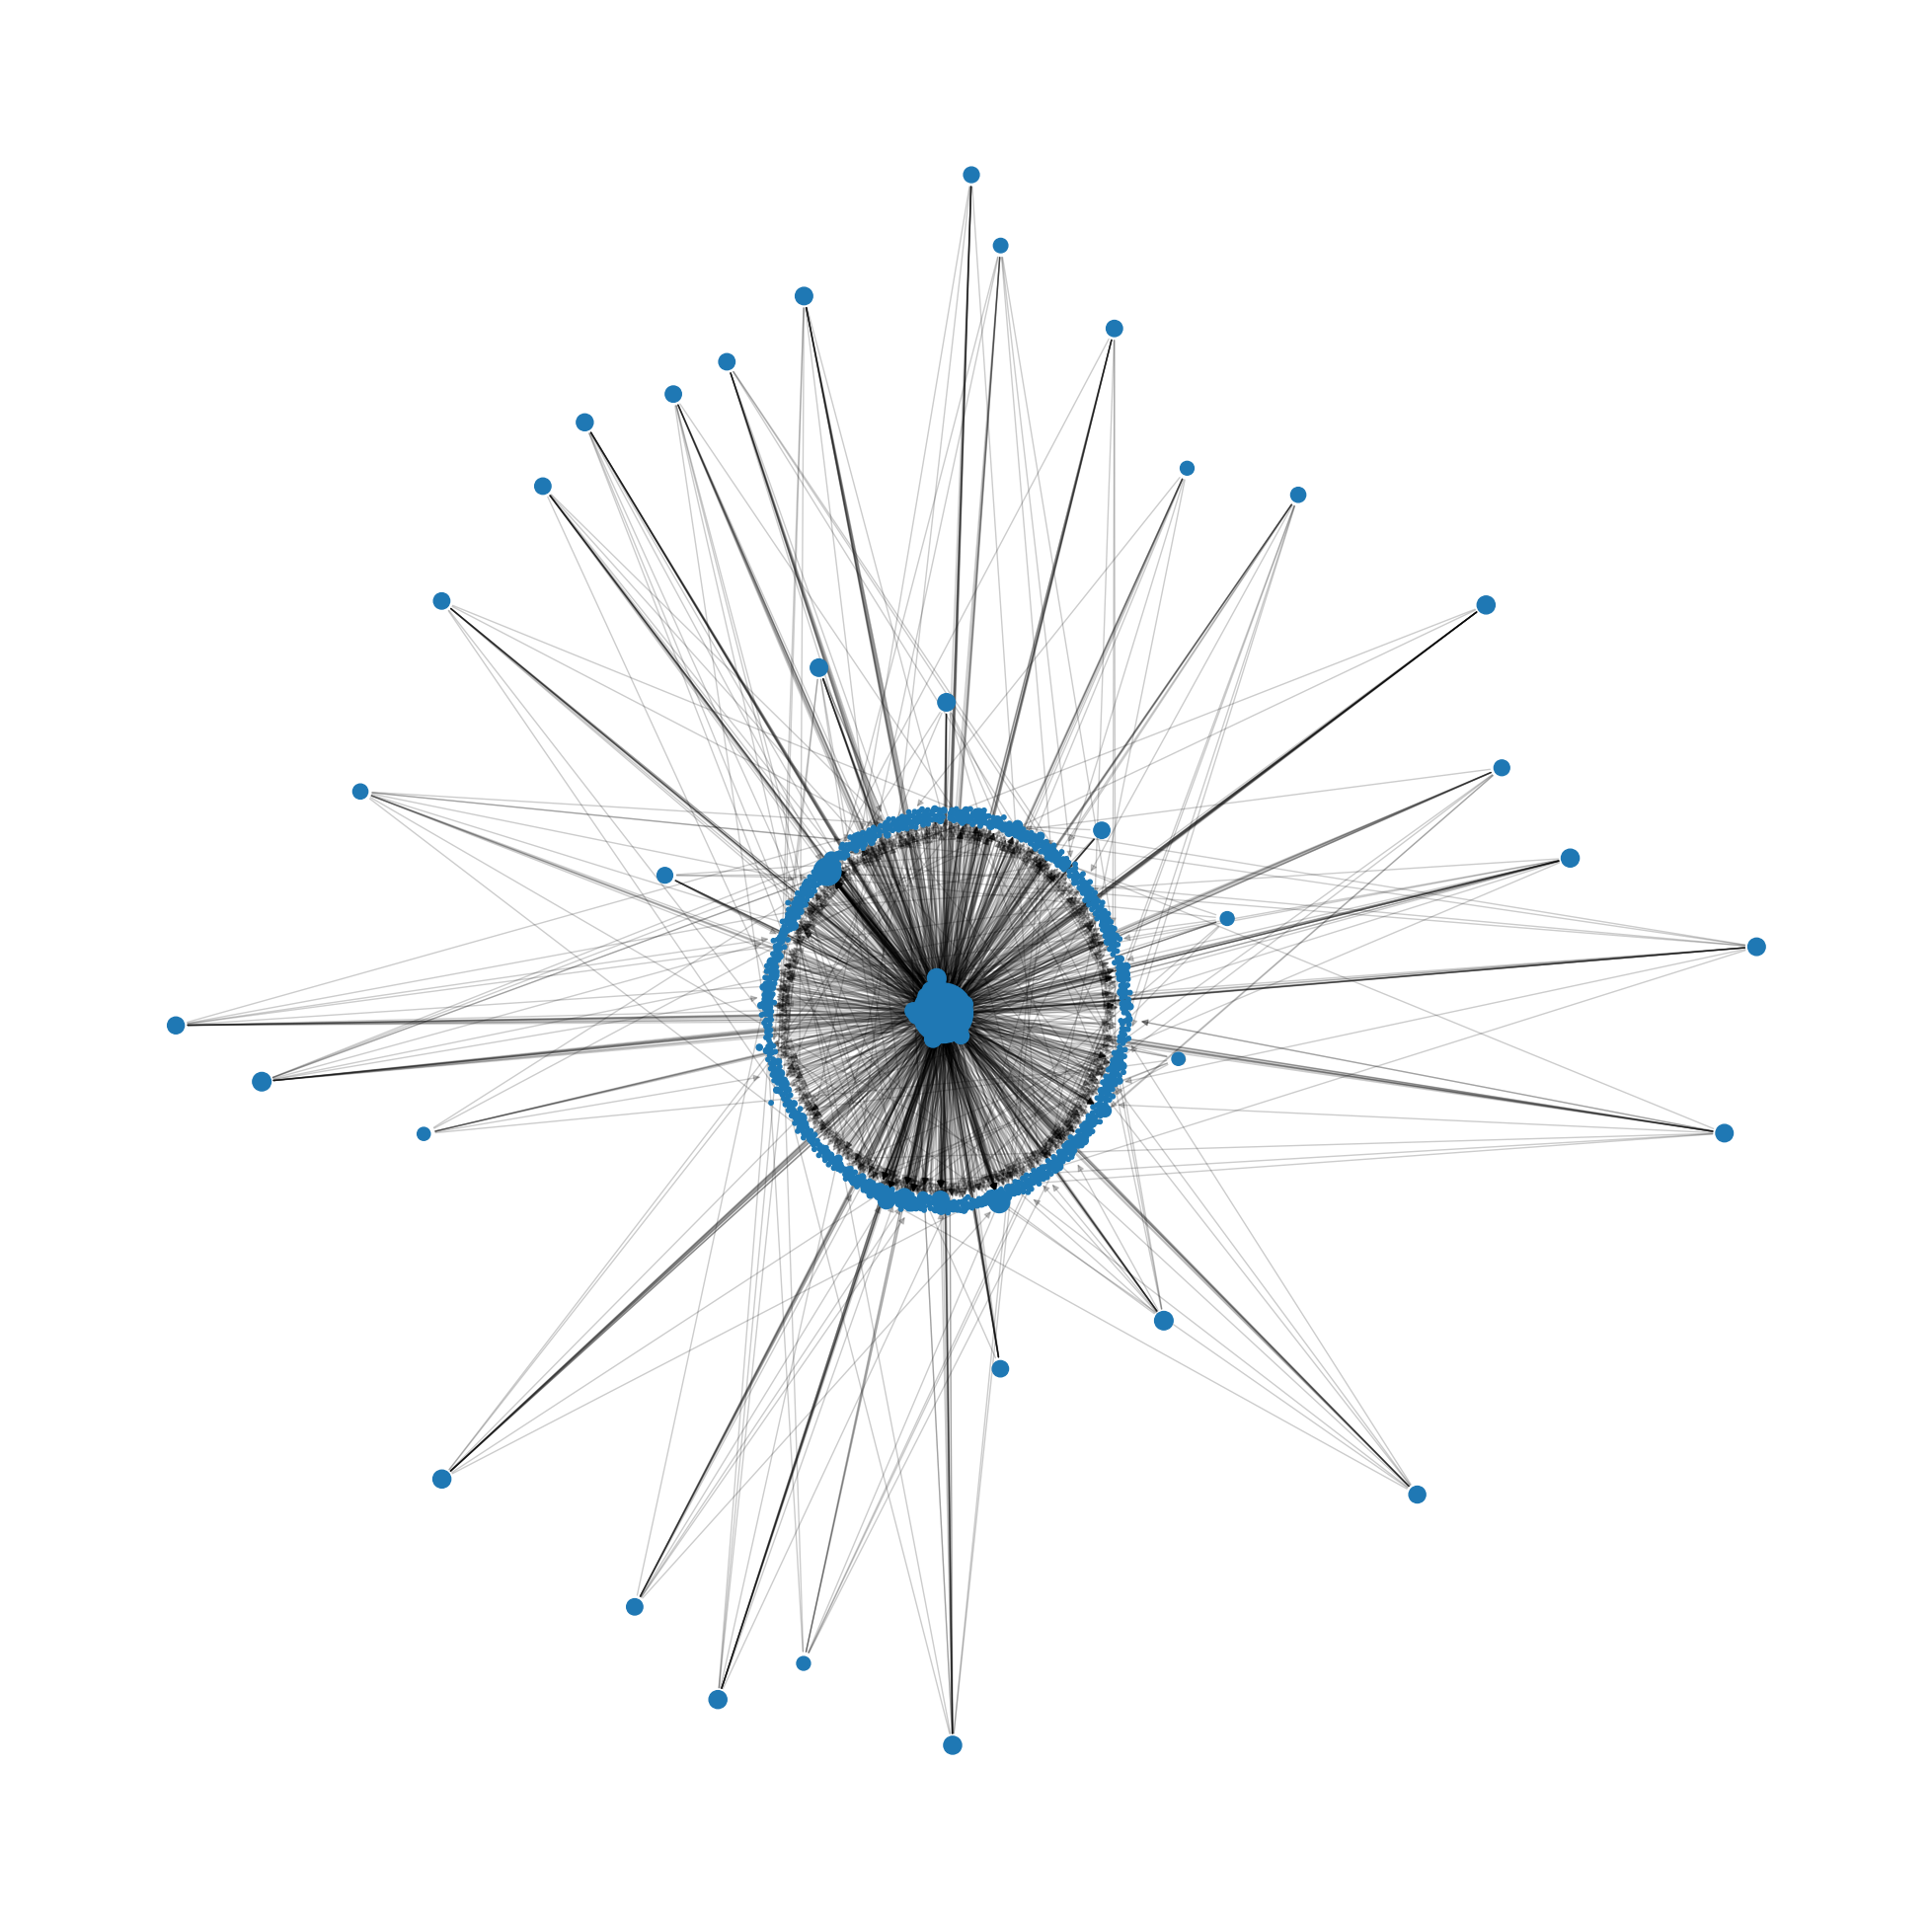

In [25]:
plt.figure(figsize=(25,25))
forceatlas2 = ForceAtlas2(# Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.5,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.5,
                        strongGravityMode=False,
                        gravity=-0.5,

                        # Log
                        verbose=True
)

positions = forceatlas2.forceatlas2_networkx_layout(H, pos=None, iterations=2500)
nx.draw_networkx_nodes(H, positions, node_size=[v * 10 for v in dict(H.degree).values()], alpha=1)
nx.draw_networkx_edges(H, positions, alpha=0.2)
plt.axis('off')

In [36]:
nx.write_gpickle(H, "C:\\Users\\LM532JA\\GitHub\\ATP_NetworkX\\graphs\\ATP_Subgraph.gpickle")

AttributeError: Can't pickle local object 'subgraph_view.<locals>.reverse_edge'